**Table of contents**<a id='toc0_'></a>    
- [**Bar Charts (Horizontal and Vertical Bar charts)**](#toc1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=4
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [18]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Setting the default seaborn theme
sns.set_theme(style="darkgrid")

# Visualizing Categories (comaparing different categories either to each other or to itself over a certain period of time)

- <i>**Questions:**
1. What’s the best? What’s the worst? Compared to what?
2. Who’s ranked the highest? The lowest?
3. How does performance compare to the target or goal? For example, did total sales exceed the forecast?

- **Insight:** use comparisons to illustrate the similarities and differences among categories. This includes the minimum value, maximum value, rank, performance, sum, totals, counts, and quantities.

- **Data:** aggregated categorical data, such as the number of books sold by author. Time series data can also be shown as a categorical variable. For example, each year can be a category.

- **Chart options:** vertical bar, column bar, horizontal bar, and bullet charts.</i>


## <a id='toc1_'></a>[**Bar Charts (Horizontal and Vertical Bar charts)**](#toc0_)

A bar chart (also called bar graph) is a chart that represents data using bars of different heights. 

`->` When to use Bar Charts

- To compare values of different categories (time independent)
- To compare value changes over a period of time for a single category.
- Bar charts work best for showing the situation at a point in time (for example, the number of products sold on a website). Their main purpose is *`to draw attention to total numbers rather than the trend (trends are more suitable for a line chart).`*

`->` When to avoid Bar Charts

- Use bar charts for **comparison** if the number of categories is quite small — up to five, but **not more than seven categories**.
- If there are too many data points consider whether line chart is a viable option

`->` Best practices for bar charts

- If one of your data dimensions is **time** — including years, quarters, months, weeks, days, or hours — you should always set the time dimension **on the horizontal axis**. In charts, time should always run from left to right, never from top to bottom.
- For bar charts, the **numerical axis must start at zero**. Our eyes are very sensitive to the height of columns, and we can draw inaccurate conclusions when those bars are truncated.
- Avoid using pattern lines or fills. Use a border only for highlights.
- Only use bar charts to show trends if there are a reasonably-low number of data points (less than 20) and if every data point has a clearly-visible value.

> `To draw` bar charts in seaborn, we will use the `seaborn.catplot(data, x, y, kind='bar'|'count')` function. The detailed documentation can be found at, https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot.

<u> Function Parameters: </u>

- `data:` DataFrame (dataset for plotting).
- `x, y, hue:` names of variables in data.
- `row, col:` Categorical variables in data that will determine the faceting of the grid (used for creating matrix of bar plots).
- `col_wrap (int):` “Wrap” the column variable at this width, so that the column facets span multiple rows. Ignored if row facet is defined.
- `height:` Height (in inches) of each facet.
- `aspect:` Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches.
- `kind:` The kind of plot to draw, corresponds to the name of a categorical axes-level plotting function. Options are: “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”.

    **For bar plots we will be using kind = "bar" | "count"**
    - `kind="bar"` operates on a full dataset and applies a function to obtain the estimate (taking the mean by default).
    - A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is done with `kind="count"`. **Note:** to use kind="count", either x or y must be none.
- `estimator:` Statistical function to estimate within each categorical bin (string or callable).
- `orient (“v” | “h”):` Orientation of the plot (vertical or horizontal). This is usually inferred based on the type of the input variables, but it can be used to resolve ambiguity when both x and y are numeric or when plotting wide-form data.
- `palette:` Colors to use for the different levels of the hue variable.  
- `share{x,y}:` If true, the facets will share y axis across columns and/or x axis across rows.

**Returns:** Returns a FacetGrid object with the plot on it for further tweaking.

> **`Note:`** We can also use the, `seaborn.barplot(data=None, *, x=None, y=None, hue=None, estimator='mean', errorbar=('ci', 95), orient=None, palette=None, ax=None, **kwargs)` function to draw barplots in seaborn. One advantage of this method is that it returns the matplotlib Axes containing the plot instead of a FacetGrid. As a result it's easier to modify the plot using matplotlib OO API. Also, this function can receive a pre-existing axes for plotting. See the documentation @https://seaborn.pydata.org/generated/seaborn.barplot.html

- #### *Vertical bar chart*

`->` Bars are arranged vertically on the x-axis. Each bar represents a category or sub-category. The bar height measures the quantity (count) or sum. In other words, *`categories (or the time periods) are in the x axis and the numerical quantities are in the y axis`*.

- Keep bars the same color and shade when they measure the same variable.
- Use a zero baseline for the y-axis and show negative values below the baseline.
- Keep the width of the bar about twice the width of the space between the bars.


In [20]:
# loading a built-in dataset
df = sns.load_dataset("titanic")

In [21]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


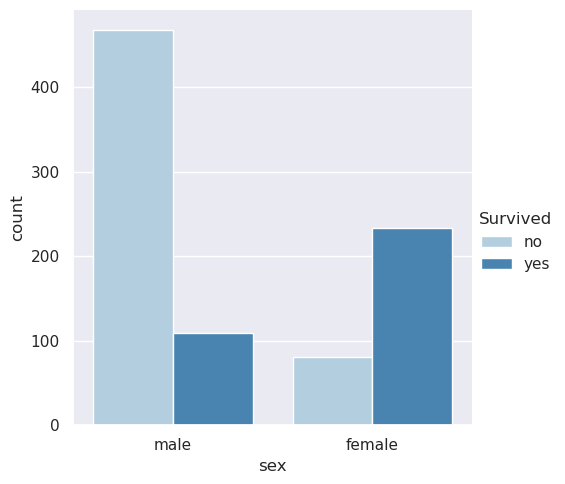

In [22]:
# to see how many passengers survived and how many didn't grouped based on their sexes,
count_plot = sns.catplot(
    df, x="sex", hue="alive", kind="count", palette="Blues", legend=False
)
count_plot.add_legend(title="Survived")

/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


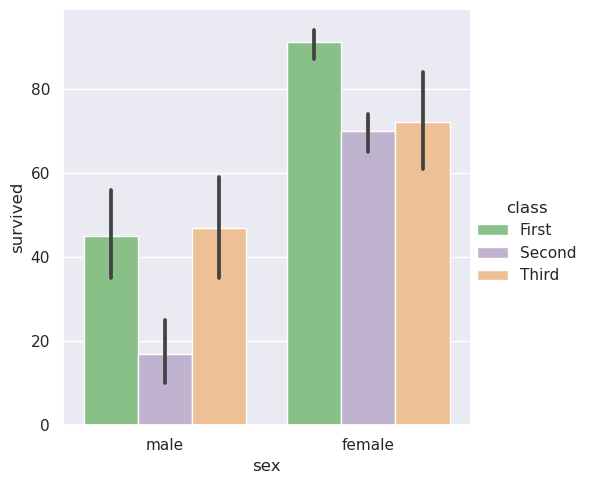

In [23]:
# to see how many passengers survived from each passenger class grouped based on their sexes,
sns.catplot(
    df,
    x="sex",
    y="survived",
    hue="class",
    kind="bar",
    estimator="sum",
    palette="Accent",
    errorbar="ci",
)

- #### *Horizontal bar chart*

`->` Bars are arranged horizontally, rather than vertically. **categories (or the time periods) are in the y axis and the numerical quantities are in the x axis**.
- *Best used for ranking, such as first place, second place, third place.*
- Arrange bars in descending order, from largest to smallest.

/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


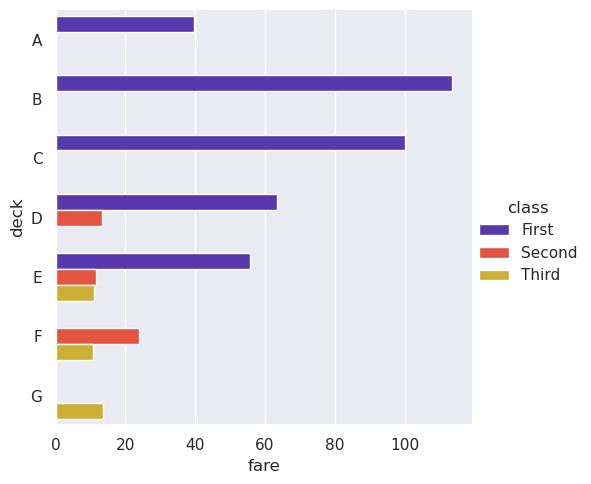

In [24]:
# to see mean fare in individual decks for each of the passenger class,
sns.catplot(
    df,
    x="fare",
    y="deck",
    hue="class",
    kind="bar",
    palette="CMRmap",
    errorbar=None,
    orient="h",
)